In [102]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Use housing data
I have loaded the required modules. Pandas and Numpy. I have also included sqrt function from Math library.<br>
I have imported division from future library. Remove this if the code is executed on Python 3. This import mimics behaviour of division operator of python 3 on python 2

In [103]:
import pandas as pd
import numpy as np
from __future__ import division
from math import sqrt

""" File path change accordingly"""
inputFilepath = "data/house.csv"

"""Using default seperator"""
housingData = pd.read_csv(inputFilepath)
housingData.head(10)

,home,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
0,1,nbhd02,2,1790,No,2,2,114300
1,2,nbhd02,3,2030,No,4,2,114200
2,3,nbhd02,1,1740,No,3,2,114800
3,4,nbhd02,3,1980,No,3,2,94700
4,5,nbhd02,3,2130,No,3,3,119800
5,6,nbhd01,2,1780,No,3,2,114600
6,7,nbhd03,3,1830,Yes,3,3,151600
7,8,nbhd03,2,2160,No,4,2,150700
8,9,nbhd02,3,2110,No,4,2,119200
9,10,nbhd02,3,1730,No,3,3,104000


### TextEncoder

Here the data is mix of numbers and text. Text value cannot be directly used and should be converted to numeric data.<br>
For this I have created a function text encoder which accepts a pandas series. Text encoder returns a lookUp dictionary for recreating the numeric value for text value and encoded text vector.
For encoding I have applied a lambda function that will return value from dictionary.

In [104]:
""" Converts the text features into numeric values so that they can be used by 
the downstream algorithms. 
Accepts pandas series and returns lookup dictionary and encoded vector"""

def textEncoder(textVector):
    if type(textVector) == pd.core.series.Series:
        
        lookUpDictionary = {}
        lookupValue = 1
        for key in textVector.unique():
            lookUpDictionary[key] = lookupValue
            lookupValue +=1
        
        textVector = textVector.apply(lambda a: lookUpDictionary[a])
        return lookUpDictionary,textVector
            
        
    else:
        raise TypeError("Expected a pandas series as an input")   

I have encoded nbhd and brick column using text encoder. The lookup dictionary is not used in downstream code. However any future predictions wil require text data to be encoded and hence I have provided the lookup dictionary.

In [105]:
nbhdFeatureLookup, housingData['nbhd'] = textEncoder(housingData['nbhd'])
brickFeatureLookup, housingData['brick'] = textEncoder(housingData['brick'])
housingData.head(10)

,home,nbhd,offers,sqft,brick,bedrooms,bathrooms,price
0,1,1,2,1790,1,2,2,114300
1,2,1,3,2030,1,4,2,114200
2,3,1,1,1740,1,3,2,114800
3,4,1,3,1980,1,3,2,94700
4,5,1,3,2130,1,3,3,119800
5,6,2,2,1780,1,3,2,114600
6,7,3,3,1830,2,3,3,151600
7,8,3,2,2160,1,4,2,150700
8,9,1,3,2110,1,4,2,119200
9,10,1,3,1730,1,3,3,104000


### SplitDataSet Procedure
This method splits the dataset into trainset and testset based upon the trainSetSize value. For splitting the dataset, I am using pandas.sample to split the data. This gives me trainset. For testset I am calculating complement of the trainset. This I am doing by droping the index present in training set.

In [106]:
"""Splits the provided pandas dataframe into training and test dataset"""
def splitDataSet(inputDataframe, trainSetSize):
    
        trainSet = inputDataframe.sample(frac=trainSetSize)
        testSet = inputDataframe.drop(trainSet.index)
        return trainSet,testSet

## 2. Choose those columns, which can help you in prediction i.e. contain some useful information. You can drop irrelevant columns. Give reason for choosing or dropping any column.

### generatePearsonCoefficient Procedure
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f76ccfa7c2ed7f5b085115086107bbe25d329cec" />
For sample:-
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0" />
For selecting some features and for dropping others I am using Pearson's Coefficient. The value of Pearson's coefficient lies between [-1, 1] and tells how two features are related<br>
<table>
<tr><td>Strength of Association</td><td>Positive</td><td>Negative</td></tr><tr><td>Small</td><td>.1 to .3  </td><td>-0.1 to -0.3  </td></tr><tr><td>Medium</td><td>.3 to .5  </td><td>-0.3 to -0.5  </td></tr><tr><td>Large</td><td>.5 to 1.0 </td><td>-0.5 to -1.0  </td></tr></table>


In [107]:
"""Generate pearson's coefficient"""

def generatePearsonCoefficient(A, B):
    A_meanDiff = A - A.mean()
    B_meanDiff = B - B.mean()
    return ((A_meanDiff * B_meanDiff).sum())/(sqrt((
        A_meanDiff * A_meanDiff).sum()) * sqrt((B_meanDiff * B_meanDiff).sum())) 

In [108]:
"""Generate the value of pearson constant for all the features"""

print("Pearson's coefficient of corelation for "+
      "nbhd and price is "+ str(generatePearsonCoefficient(housingData.nbhd,housingData.price)))

print("Pearson's coefficient of corelation for "+
      "offers and price is "+ str(generatePearsonCoefficient(housingData.offers,housingData.price)))

print("Pearson's coefficient of corelation for "+
      "sqft and price is "+ str(generatePearsonCoefficient(housingData.sqft,housingData.price)))

print("Pearson's coefficient of corelation for "+
      "bedrooms and price is "+ str(generatePearsonCoefficient(housingData.bedrooms,housingData.price)))

print("Pearson's coefficient of corelation for "+
      "bathrooms and price is "+ str(generatePearsonCoefficient(housingData.bathrooms,housingData.price)))

print("Pearson's coefficient of corelation for "+
      "brick and price is "+ str(generatePearsonCoefficient(housingData.brick,housingData.price)))

Pearson's coefficient of corelation for nbhd and price is 0.490761628535
Pearson's coefficient of corelation for offers and price is -0.313635882862
Pearson's coefficient of corelation for sqft and price is 0.552982242555
Pearson's coefficient of corelation for bedrooms and price is 0.52592605764
Pearson's coefficient of corelation for bathrooms and price is 0.523257758186
Pearson's coefficient of corelation for brick and price is 0.452816786191


The value of Pearson's constant suggests that sqft, bedroom and bathroonm have strong corelation with price. Offers has a weak negative corelation and nbhd and brick has mediup corelation with price. I am keeping all the features as they have some corelation with the data.

# Visualizing the relation between the X and Y
Here I have used subplots to plot different X features and their relation with Y.

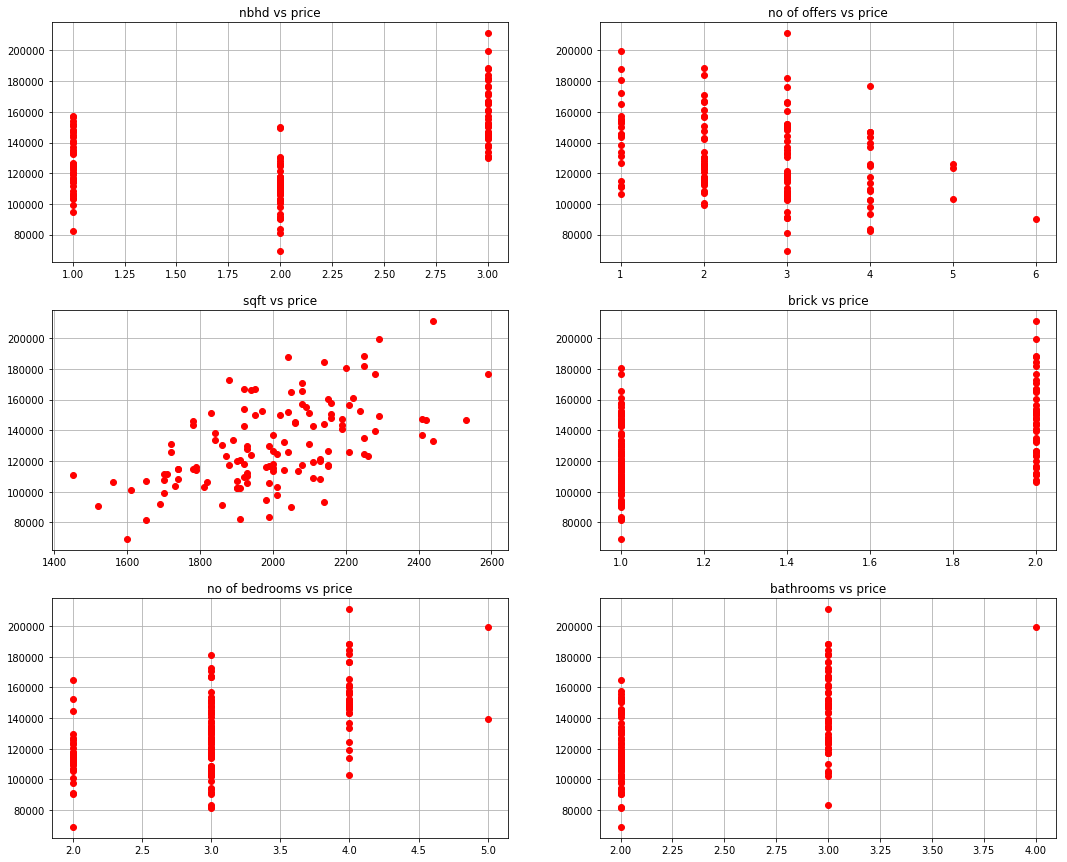

In [109]:
import matplotlib.pyplot as plt

"""Set global rcParams for pyplotlib"""
plt.rcParams["figure.figsize"] = "18,15"

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6))  = plt.subplots(3,2,sharey='none')

ax1.plot(housingData.nbhd,housingData.price,"ro")
ax1.grid()
ax1.set_title("nbhd vs price")


ax2.plot(housingData.offers,housingData.price,"ro")
ax2.grid()
ax2.set_title("no of offers vs price")

ax3.plot(housingData.sqft,housingData.price,"ro")
ax3.grid()
ax3.set_title("sqft vs price")

ax4.plot(housingData.brick,housingData.price,"ro")
ax4.grid()
ax4.set_title("brick vs price")

ax5.plot(housingData.bedrooms,housingData.price,"ro")
ax5.grid()
ax5.set_title("no of bedrooms vs price")

ax6.plot(housingData.bathrooms,housingData.price,"ro")
ax6.grid()
ax6.set_title("bathrooms vs price")


plt.show()

### gaussianSolverProcedure
<b>Algorithm:-</b><br>
<b>Step-1</b><br>
Generate an augmented matrix.<br>
<b>Step-2</b><br>
Calculate pivot for a given column. Pivot is defined as a largest value in column following its index.<br>
<b>Step-3</b><br>
Place the piviot in the current row column.(Swap the row)<br>
<b>Step-4</b><br>
Make the value of other elements under pivot as zero. Use only row operations for this. Repeat this untill we get a upper triangular matrix.<br>
<b>Step-5</b><br>
Solve the upper trangular matrix using backward substitution.<br><br>

The gaussian solver accepts two matrices A and B and tries to solve for x such that Ax = B


In [110]:
"""Method for solving system of linear equations using gaussian elimination method"""

def gaussianSolver(A,B):
    augmentedMatrix = np.hstack((A,B)) * 1.0
    n = augmentedMatrix.shape[0]
    for i in range(0, n):
        
        """Set default pivot value as diagonal matrix """
        pivot = augmentedMatrix[i][i]
        pivotRow = i
        
        """Check for a bigger pivot value"""
        for j in range(i+1, n):
            if abs(augmentedMatrix[j][i]) > abs(pivot):
                pivot = augmentedMatrix[j][i]
                pivotRow = j
                
        """If pivot has changed. Swap the rows"""
        if pivotRow != i:
            for j in range(0, n+1):
                augmentedMatrix[pivotRow][j], augmentedMatrix[i][j] =  augmentedMatrix[i][j], augmentedMatrix[pivotRow][j]
            
        """Make all the column values below pivot as zero by performing matrix row operations"""
        for j in range(i+1, n):
            op = -1 * (augmentedMatrix[j][i]/augmentedMatrix[i][i])
            for k in range(0, n+1):
                augmentedMatrix[j][k] = augmentedMatrix[j][k] + ( op * augmentedMatrix[i][k] )
                
    """ Backward substitution to get values for B"""            
    beta = np.zeros(n)
    for i in range(n - 1, -1,-1):
        diff = 0
        for k in range (i + 1, n):
            diff = diff + (beta[k] * augmentedMatrix[i][k])
        beta[i] = (augmentedMatrix[i][n] - diff)/augmentedMatrix[i][i]
        

    return beta

### choleskyDecompositionSolver Procedure
As per cholesky decomposition a positive definite matrix A can be represented as L.L<sup>T</sup> where L<sup>T</sup> is lower trangular matrix and L<sup>T</sup> is it's transpose.<br>
Here L is called cholesky factor<br>
The problem comes down to L.L<sup>T</sup>x = B<br>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/abf826b0ffb86e190d432828d7485f52f618eaed" />
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bb5adc5916e0762b2eca921de3e70ccae9bd2999" />

<b>Algorithm:-</b><br>
<b>Step-1</b><br>
Initialize a zero matrix<br>
<b>Step-2</b><br>
Calculate L using the above formula. If calculating for a diagonal element then stop the procedure and move to calculate for next row. This will generate lower trangular matrix<br/>
<b>Step-3</b><br>
Calculate vector Y using forward substitution. LY = b<br>
<b>Step-4</b><br>
Calculate vector X using backward substitution.L*X  = Y<br>

In [111]:
"""Method for solving the system of linear equations using cholesky decomposition"""

def choleskyDecompositionSolver(A, B):
    """Converting the matrix values to float"""
    A = A * 1.0
    B = B * 1.0
    
    n = A.shape[0]
    if A.shape[0] == A.shape[1]:
        
        """Generate cholesky factor"""
        L = np.zeros(shape = A.shape)
        for i in range(0, n):
            for j in range (0, n):
                L[i][j] = A[i][j]
                """Calculating diagonal elements"""
                if i == j:
                    for k in range(0, j):
                        L[i][j] = L[i][j] - (L[i][k] * L[i][k])
                    
                    L[i][j] = sqrt(L[i][j])
                    break;
                """Calculating non diagonal elements"""
                product = 0
                for k in range (0, j):
                    product = product + (L[i][k] * L[j][k])                    
                L[i][j] = (L[i][j] - product)/L[j][j]
        
        """Solving the system of linear equation
        Ax=b 
        A can be decomposed into LU such that
        Ly=b 
        Ux=y """
        
        """Forward substitution"""
        Y = np.zeros(n)
        for i in range(0, n):
            diff = 0
            for k in range (i -1, -1, -1):
                diff = diff + (Y[k] * L[i][k])
            Y[i] = (B[i] - diff)/L[i][i]
        
        """Backward substitution"""
        beta = np.zeros(n)
        U = L.T
        for i in range(n - 1, -1,-1):
            diff = 0
            for k in range (i + 1, n):
                diff = diff + (beta[k] * U[i][k])
            beta[i] = (Y[i] - diff)/U[i][i]
            
        return beta
    else:
        raise ValueError("Matrix A is not symmetric")

### qrDecompositionSolver Procedure
A matrix A can be represented as product of Q and R where Q is orthogonal matrix (Q<sup>T</sup>Q = QQ<sup>T</sup> = I) and R is upper triangular matrix.
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/4b845398dd7df51edc31561a612423b20a83eb04" />
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/74356955f03f5c1171e9e812174a715eb112aef8" />
<br>QR decompsition can be done in four steps
<ul><li>Calculation of orthogonal basis</li><li>Calculation of orthonormal</li><li>QR factor calculation</li><li>Solving system of linear equation</li></ul>
<br>
<b>Algorithm:-</b><br>
<b>Step-1</b><br>
Calculate orthogonal basis using gram Schmidt method. For first vector the value is itself. For subsequent vectors the orthogonalbasis is vector - projection on perviously calculated orthogonal basis
<br><b>Step-2</b><br>
For calculating orthonormal we divide orthogonal basis by magnitude of respective vectors
<br><b>Step-3</b><br>
Q = [orthonormalBasis]<br>
R = Q<sup>T</sup>A
<br><b>Step-4</b><br>
For calculating the value of X in AX = B,<br>
We calculate Y = Q<sup>T</sup>B<br>
We solve RX = Y using backward substitution


In [112]:
"""QR decomposition can be done in three steps
    1) Calculation orthogonal basis
    2) Calculation orthonormal
    3) QR factor calculation"""

def qrDecompositionSolver(A, B):
    A = A * 1.0
    B = B * 1.0
    """Calculating the orthogonal basis"""
    n = A.shape[1]
    # Store deepcopy of A for processing
    orthoBasis = np.array(A, copy = True)
    
    for i in range(1, n):
        """Calculate the projections"""
        diff = 0
        for j in range(i-1, -1, -1):
            diff = diff + (np.dot(orthoBasis[:,i],
                                  orthoBasis[:,j])/np.dot(orthoBasis[:,j],orthoBasis[:,j]))*orthoBasis[:,j]
        orthoBasis[:,i] = orthoBasis[:,i] - diff
    
    """Calculating orthonormal"""
    for i in range(0, n):
        orthoBasis[:,i] = orthoBasis[:,i]/np.sqrt(np.sum(np.square(orthoBasis[:,i])))
        
    """QR factorization"""
    Q = orthoBasis
    R = np.dot(orthoBasis.T,A)
    
    """Solving system of linear equation"""
    B = np.dot(Q.T,B)
    
    """Backward substitution"""
    beta = np.zeros(n)

    for i in range(n - 1, -1,-1):
        diff = 0
        for k in range (i + 1, n):
            diff = diff + (beta[k] * R[i][k])
        beta[i] = (B[i] - diff)/R[i][i]
            
    return beta
    


### learnLinregNormEq
Solves system of linear equation in form of <br>
X<sup>T</sup>XB = X<sup>T</sup>Y<br>
Accepts three arguments X, Y and solver. Default value for solver is gaussianSolver

In [113]:
"""Method to learn linear regression using normal equations. Default solver is
gaussian solver"""

def learnLinregNormEq(X, Y, solver = gaussianSolver):
    
    if isinstance(X,np.ndarray) and isinstance(Y,np.ndarray):
        if X.shape[0] != Y.shape[0]:
            raise ValueError("The shape of X and Y is inconsistant")

        X = np.insert(X, 0, 1, axis=1)
        
        Xtranspose = X.T
        XtX = np.dot(Xtranspose,X)
        XtY = np.dot(Xtranspose,Y)
        return solver(XtX, XtY)
        
        
    else:
        raise TypeError("Expected X and Y as numpy.ndarray")

### predictLinearRegression Procedure
This method performs predicts the value for Y given X and model parameters. This method will add bias to X.

In [114]:
"""Method to make prediction for yTest"""
def predictionLinearRegression(X, modelParameters):
    X = np.insert(X, 0, 1, axis=1)
    yPrediction = np.dot(X,modelParameters.T)
    return yPrediction 

### RMSE procedure
Will calculate root mean squared error for given Ytrue values and YPrediction


In [115]:
"""Model accuracy estimator RMSE"""

def RMSE(yTrue, yPrediction):
    n = yTrue.shape[0]
    return sqrt((1.0) * np.sum(np.square((yTrue - yPrediction))))/n

# Solving the linear equations using gaussianSolver
Here I am splitting the dataset into training and test set. For this I am using splitDataSet procedure with 80-20 split.<br>
I have taken all the features.

In [116]:
trainSet,testSet = splitDataSet(housingData,0.8)

Ytrain = trainSet.as_matrix(columns=['price'])
Ytest = testSet.as_matrix(columns=['price'])

print("Total items in training set "+str(Ytrain.shape))
print("Total items in test set "+str(Ytest.shape))

Xtrain = trainSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])
Xtest = testSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])

Total items in training set (102, 1)
Total items in test set (26, 1)


I am learning linear regression using default (Gaussian) solver. I am making predictions using predictionLinearRegression procedure. I am calculating the RMSE using RMSE procedure and average of residuals using mean.

In [117]:
"""Learn model parameters using gaussian solver"""
modelParamsGaussian = learnLinregNormEq(Xtrain, Ytrain)
"""Make prediction using modelParams"""
yPredictionGaussian = predictionLinearRegression(Xtest, modelParamsGaussian)

"""Calulate RMSE"""
print("RMSE for gaussian solver is "+str(RMSE(Ytest.flatten(),yPredictionGaussian)))
print("Average residual for gaussian solver is "+str((Ytest.flatten() - yPredictionGaussian).mean()))

RMSE for gaussian solver is 1944.59119467
Average residual for gaussian solver is -520.438844314


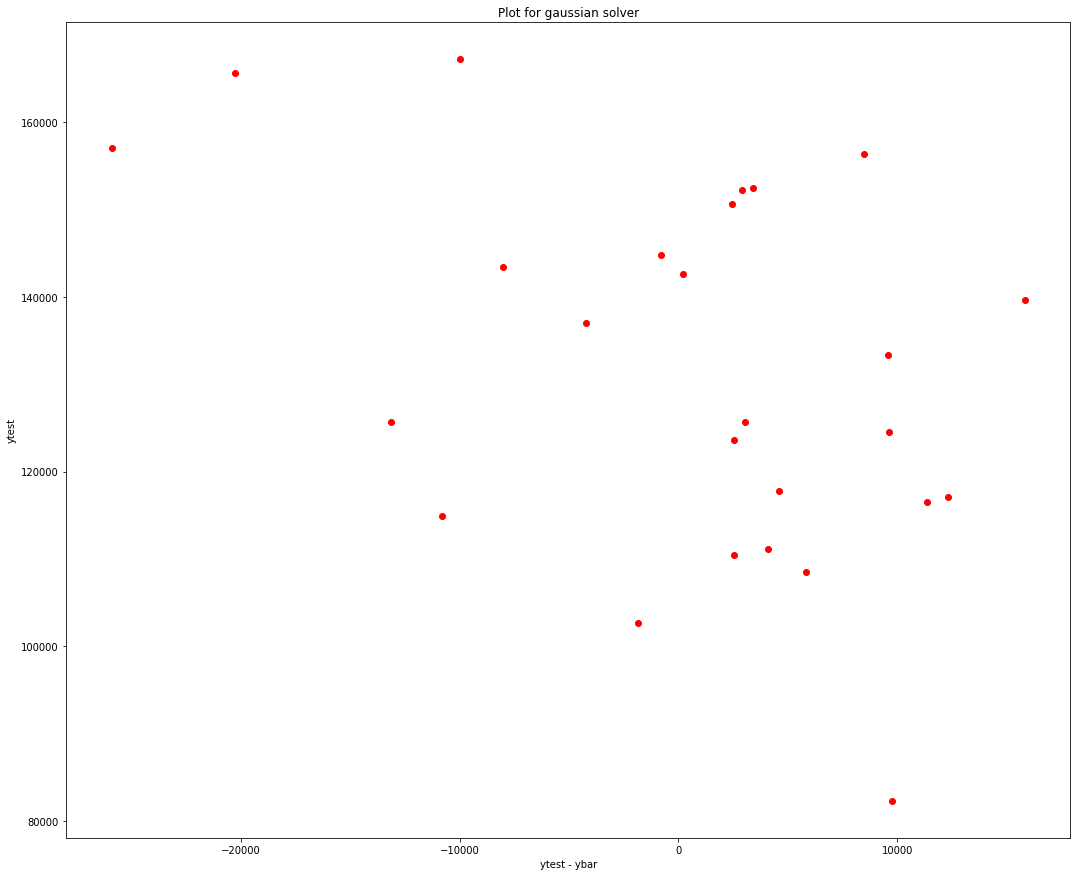

In [118]:
plt.plot(yPredictionGaussian - Ytest.flatten(), Ytest,"ro",label="ytest - ybar vs ytest")
plt.title("Plot for gaussian solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()

# Solving the system of equations using Cholesky method

In [119]:
trainSet,testSet = splitDataSet(housingData,0.8)

Ytrain = trainSet.as_matrix(columns=['price'])
Ytest = testSet.as_matrix(columns=['price'])

print("Total items in training set "+str(Ytrain.shape))
print("Total items in test set "+str(Ytest.shape))

Xtrain = trainSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])
Xtest = testSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])


Total items in training set (102, 1)
Total items in test set (26, 1)


In [120]:
"""Learn model parameters using Cholesky solver"""
modelParamsCholesky = learnLinregNormEq(Xtrain, Ytrain,choleskyDecompositionSolver)
"""Make prediction using modelParams"""
yPredictionCholesky = predictionLinearRegression(Xtest, modelParamsCholesky)

"""Calulate RMSE"""
print("RMSE for Cholesky solver is "+str(RMSE(Ytest.flatten(),yPredictionCholesky)))
print("Average residual for Cholesky solver is "+str((Ytest.flatten() - yPredictionCholesky).mean()))


RMSE for Cholesky solver is 1997.72656566
Average residual for Cholesky solver is -3950.96105727


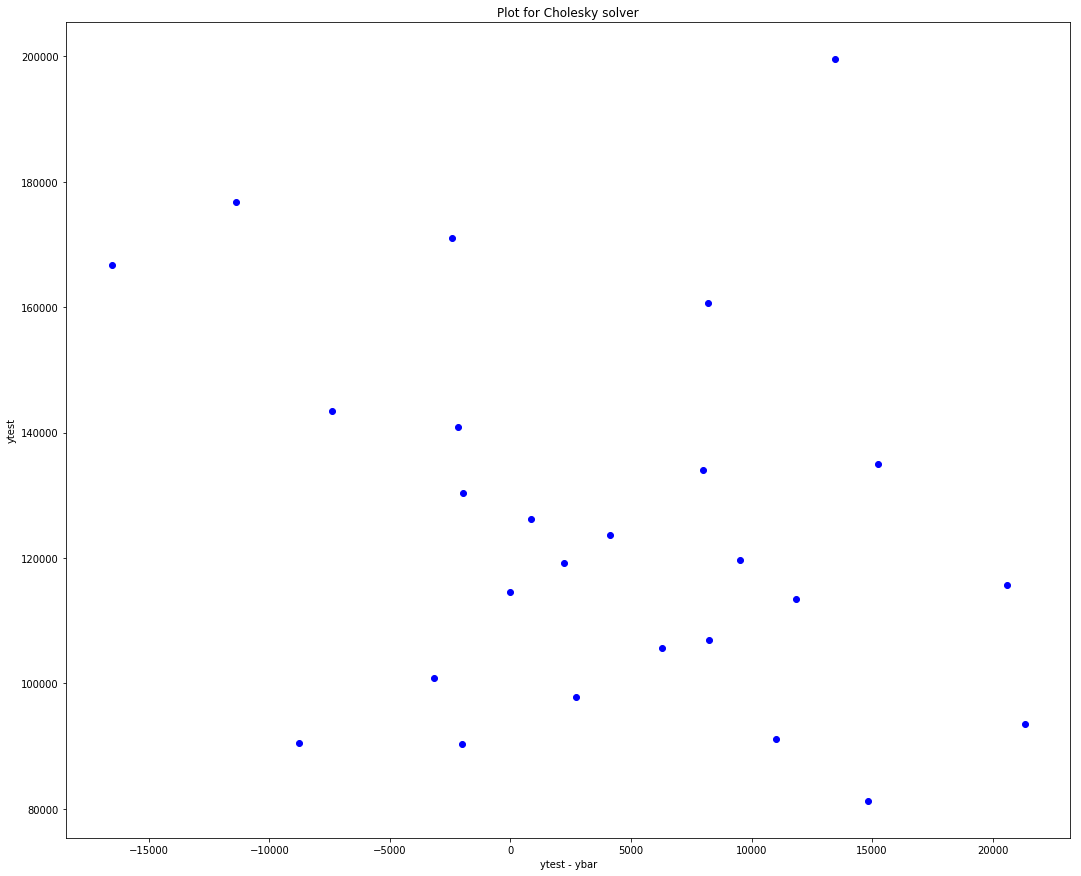

In [121]:
plt.plot(yPredictionCholesky - Ytest.flatten(), Ytest,"bo",label="ytest - ybar vs ytest")
plt.title("Plot for Cholesky solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()

# Solving the system of equations using QR decomposition method

In [122]:
trainSet,testSet = splitDataSet(housingData,0.8)

Ytrain = trainSet.as_matrix(columns=['price'])
Ytest = testSet.as_matrix(columns=['price'])

print("Total items in training set "+str(Ytrain.shape))
print("Total items in test set "+str(Ytest.shape))

Xtrain = trainSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])
Xtest = testSet.as_matrix(columns = ['sqft','bedrooms','bathrooms','brick','nbhd','offers'])



Total items in training set (102, 1)
Total items in test set (26, 1)


In [123]:
"""Learn model parameters using QR Decomposition solver"""
modelParamsQR = learnLinregNormEq(Xtrain, Ytrain,qrDecompositionSolver)

"""Make prediction using modelParams"""
yPredictionQR = predictionLinearRegression(Xtest, modelParamsQR)

"""Calulate RMSE"""
print("RMSE for QR Decomposition solver is "+str(RMSE(Ytest.flatten(),yPredictionQR)))
print("Average residual for QR Decomposition solver is "+str((Ytest.flatten() - yPredictionQR).mean()))

RMSE for QR Decomposition solver is 2332.8317377
Average residual for QR Decomposition solver is -1032.18894441


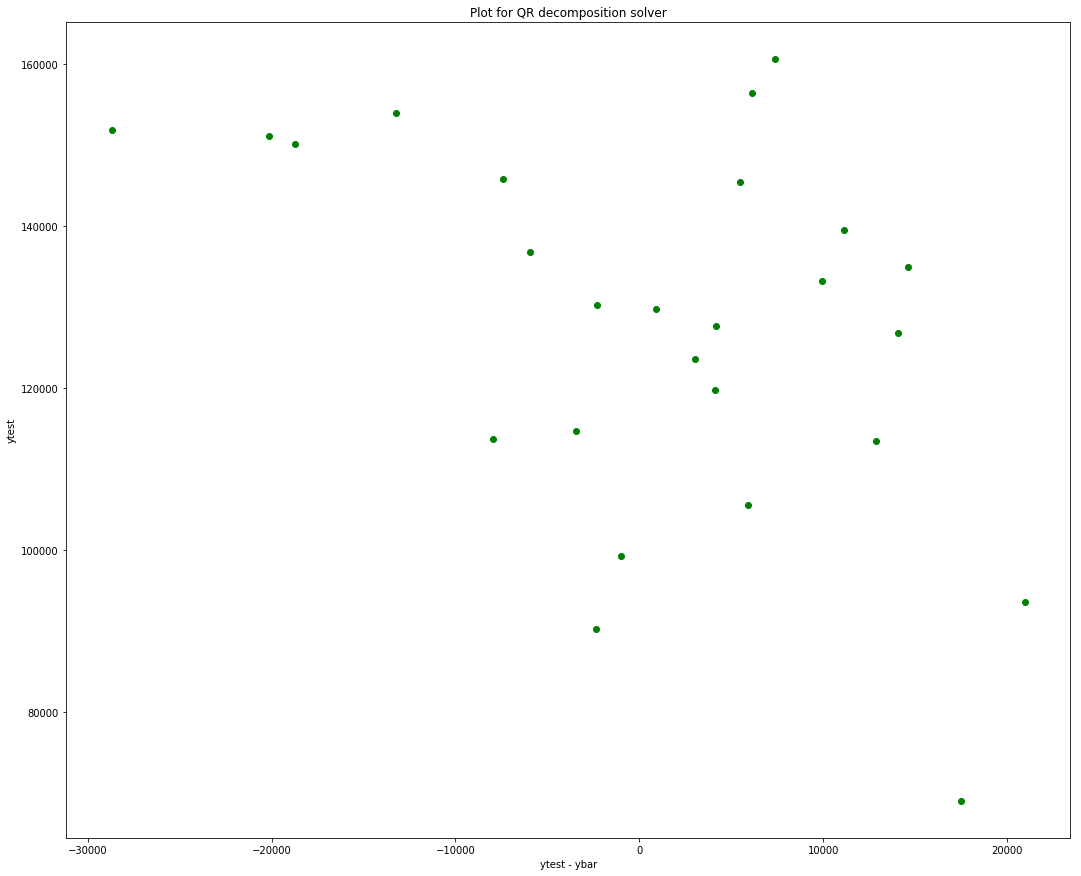

In [124]:
plt.plot(yPredictionQR - Ytest.flatten(), Ytest,"go",label="ytest - ybar vs ytest")
plt.title("Plot for QR decomposition solver")
plt.xlabel("ytest - ybar")
plt.ylabel("ytest")
plt.show()